# Benford's Law Test

This notebook aims to make a better sense of Benford's Law. It does not strive to be anything scientific, but rather a curious look. To me, personally, it would seem intuitively implausible that Benford's law could apply to normal distributions with medians having starting digits such as 5-6.

## What is Benford's Law

Benford's Law is an observation about the frequency distribution of leading digits in many real-life sets of numerical data. The law states that in many naturally occurring collections of numbers, the leading digit is likely to be small.[1] For example, in sets that obey the law, the number 1 appears as the leading significant digit about 30% of the time, while 9 appears as the leading significant digit less than 5% of the time. If the digits were distributed uniformly, they would each occur about 11.1% of the time.[2] Benford's law also makes predictions about the distribution of second digits, third digits, digit combinations, and so on.

(literally copied from Wikipedia. Again, not striving to go very scientific here).

## About the data

The dataset logs play by play data from the National Football League between 2009 and 2018, obtained from Kaggle (https://www.kaggle.com/maxhorowitz/nflplaybyplay2009to2016). The choice is essentially due to loving the sport and having a massive amount of data that'll likely display the condition I'm looking for somewhere.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
NFL_data = pd.read_csv(r'C:\Users\rodri\OneDrive\Desktop\Data Science\Datasets\NFL Play by Play 2009-2018.csv')

D:\Anaconda\lib\site-packages\IPython\core\interactiveshell.py:3051: DtypeWarning: Columns (42,166,167,168,169,174,175,178,179,182,183,188,189,190,191,194,195,203,204,205,218,219,220,231,232,233,238,240,241,249) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
NFL_data.head()

,play_id,game_id,home_team,away_team,posteam,posteam_type,defteam,side_of_field,yardline_100,game_date,...,penalty_player_id,penalty_player_name,penalty_yards,replay_or_challenge,replay_or_challenge_result,penalty_type,defensive_two_point_attempt,defensive_two_point_conv,defensive_extra_point_attempt,defensive_extra_point_conv
0,46,2009091000,PIT,TEN,PIT,home,TEN,TEN,30.0,2009-09-10,...,NaN,NaN,NaN,0,NaN,NaN,0.0,0.0,0.0,0.0
1,68,2009091000,PIT,TEN,PIT,home,TEN,PIT,58.0,2009-09-10,...,NaN,NaN,NaN,0,NaN,NaN,0.0,0.0,0.0,0.0
2,92,2009091000,PIT,TEN,PIT,home,TEN,PIT,53.0,2009-09-10,...,NaN,NaN,NaN,0,NaN,NaN,0.0,0.0,0.0,0.0
3,113,2009091000,PIT,TEN,PIT,home,TEN,PIT,56.0,2009-09-10,...,NaN,NaN,NaN,0,NaN,NaN,0.0,0.0,0.0,0.0
4,139,2009091000,PIT,TEN,PIT,home,TEN,PIT,56.0,2009-09-10,...,NaN,NaN,NaN,0,NaN,NaN,0.0,0.0,0.0,0.0


In [4]:
pd.set_option('display.max_columns', 500)

In [5]:
NFL_data.describe()

,play_id,game_id,yardline_100,quarter_seconds_remaining,half_seconds_remaining,game_seconds_remaining,quarter_end,drive,sp,qtr,down,goal_to_go,ydstogo,ydsnet,yards_gained,shotgun,no_huddle,qb_dropback,qb_kneel,qb_spike,qb_scramble,air_yards,yards_after_catch,kick_distance,home_timeouts_remaining,away_timeouts_remaining,timeout,posteam_timeouts_remaining,defteam_timeouts_remaining,total_home_score,total_away_score,posteam_score,defteam_score,score_differential,posteam_score_post,defteam_score_post,score_differential_post,no_score_prob,opp_fg_prob,opp_safety_prob,opp_td_prob,fg_prob,safety_prob,td_prob,extra_point_prob,two_point_conversion_prob,ep,epa,total_home_epa,total_away_epa,total_home_rush_epa,total_away_rush_epa,total_home_pass_epa,total_away_pass_epa,air_epa,yac_epa,comp_air_epa,comp_yac_epa,total_home_comp_air_epa,total_away_comp_air_epa,total_home_comp_yac_epa,total_away_comp_yac_epa,total_home_raw_air_epa,total_away_raw_air_epa,total_home_raw_yac_epa,total_away_raw_yac_epa,wp,def_wp,home_wp,away_wp,wpa,home_wp_post,away_wp_post,total_home_rush_wpa,total_away_rush_wpa,total_home_pass_wpa,total_away_pass_wpa,air_wpa,yac_wpa,comp_air_wpa,comp_yac_wpa,total_home_comp_air_wpa,total_away_comp_air_wpa,total_home_comp_yac_wpa,total_away_comp_yac_wpa,total_home_raw_air_wpa,total_away_raw_air_wpa,total_home_raw_yac_wpa,total_away_raw_yac_wpa,punt_blocked,first_down_rush,first_down_pass,first_down_penalty,third_down_converted,third_down_failed,fourth_down_converted,fourth_down_failed,incomplete_pass,interception,punt_inside_twenty,punt_in_endzone,punt_out_of_bounds,punt_downed,punt_fair_catch,kickoff_inside_twenty,kickoff_in_endzone,kickoff_out_of_bounds,kickoff_downed,kickoff_fair_catch,fumble_forced,fumble_not_forced,fumble_out_of_bounds,solo_tackle,safety,penalty,tackled_for_loss,fumble_lost,own_kickoff_recovery,own_kickoff_recovery_td,qb_hit,rush_attempt,pass_attempt,sack,touchdown,pass_touchdown,rush_touchdown,return_touchdown,extra_point_attempt,two_point_attempt,field_goal_attempt,kickoff_attempt,punt_attempt,fumble,complete_pass,assist_tackle,lateral_reception,lateral_rush,lateral_return,lateral_recovery,lateral_sack_player_id,lateral_sack_player_name,assist_tackle_4_player_id,assist_tackle_4_player_name,assist_tackle_4_team,fumble_recovery_1_yards,fumble_recovery_2_yards,return_yards,penalty_yards,replay_or_challenge,defensive_two_point_attempt,defensive_two_point_conv,defensive_extra_point_attempt,defensive_extra_point_conv
count,449371.000000,4.493710e+05,436301.000000,449230.000000,449206.000000,449208.000000,449371.000000,449371.000000,449371.000000,449371.000000,381409.000000,436664.000000,449371.000000,449371.000000,449158.000000,449371.000000,449371.000000,436497.000000,449371.000000,449371.000000,449371.000000,175719.000000,108907.000000,50740.000000,449371.000000,449371.000000,436497.000000,436492.000000,436492.000000,449371.000000,449371.000000,433952.000000,433952.000000,433952.000000,436492.000000,436492.000000,436492.000000,448693.000000,448693.000000,448693.000000,448693.000000,448693.000000,448693.000000,448693.000000,449371.000000,449371.000000,435812.000000,433535.000000,449371.000000,449371.000000,449371.000000,449371.000000,449371.000000,449371.000000,174082.000000,173699.000000,436299.000000,436111.000000,449371.000000,449371.000000,449371.000000,449371.000000,449371.000000,449371.000000,449371.000000,449371.000000,433313.000000,4.333130e+05,435388.000000,435388.000000,444050.000000,433334.000000,433334.000000,449371.000000,449371.000000,449371.000000,449371.000000,173940.000000,173724.000000,436156.000000,436064.000000,449371.000000,449371.000000,449371.000000,449371.000000,449371.000000,449371.000000,449371.000000,449371.000000,436497.000000,436497.000000,436497.000000,436497.000000,436497.000000,436497.000000,436497.000000,436497.000000,436497.000000,436497.000000,436497.000000,436497.000000,436497.000000,436497.000000,436497.000000,436497.000000,436497.000000,436497.000000,436497.000000,436497.0

Text(0, 0.5, 'Count')

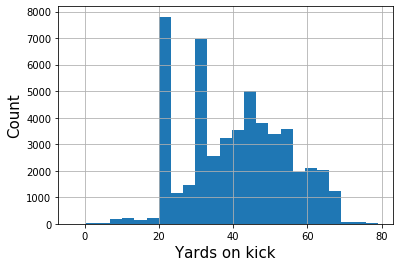

In [6]:
# Checking yards per kick, which seems to have an adequate behavior for what I'm trying to look at

NFL_data["kick_distance"].hist(bins=25)
plt.xlabel("Yards on kick", fontsize=15)
plt.ylabel("Count", fontsize=15)

#### As expected, we're getting values fairly normally distributed, with a high average number.

I don't see a reason why 1 should be the leading first digit in terms of apperance in this. However, we're here to test it, so let's do it.

In [7]:
# creating dataframes for the data that matters
benford_kicks = pd.DataFrame(NFL_data["kick_distance"])

# getting rid of the NaNs (irrelevant for the analysis)
benford_kicks.dropna(how='all', inplace=True)

In [8]:
# slicing first digit
benford_kicks['first_digit'] = benford_kicks['kick_distance'].astype(str).str[0]

In [9]:
# Replacing non-sense values and bringing columns back to numeric values
benford_kicks = benford_kicks.replace('-', 0)
benford_kicks['first_digit'] = pd.to_numeric(benford_kicks['first_digit'], errors='coerce')

Text(0, 0.5, 'Count')

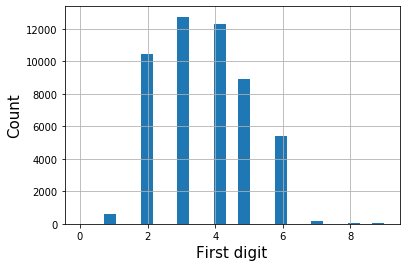

In [10]:
# plotting it out

benford_kicks['first_digit'].hist(bins=25)
plt.xlabel("First digit", fontsize=15)
plt.ylabel("Count", fontsize=15)

Okay, so I'm not completely nuts. Always good to know. It doesn't make Benford's Law any less puzzling, though.

If we look towards a more even distribution, such as lottery number results, would we have about just about the same behavior?

In [17]:
# Reading lottery results file
lottery = pd.read_csv(r'C:\Users\rodri\OneDrive\Desktop\Data Science\Datasets\lottery.csv', engine='python', sep=";")

In [18]:
lottery.head()

,ID,Date,Number
0,2290,15/08/2020,5
1,2290,15/08/2020,18
2,2290,15/08/2020,36
3,2290,15/08/2020,44
4,2290,15/08/2020,57


Text(0, 0.5, 'Count')

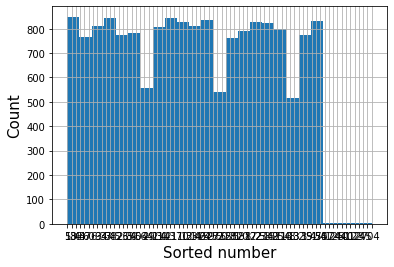

In [19]:
# plotting out the distribution

lottery["Number"].hist(bins=25)
plt.xlabel("Sorted number", fontsize=15)
plt.ylabel("Count", fontsize=15)

#### The distribution is a lot more even, as expected. Would that influence Benford Law testing?

In [21]:
lottery['first_digit'] = lottery['Number'].astype(str).str[0]
lottery['first_digit'] = pd.to_numeric(lottery['first_digit'], errors='coerce')
lottery

,ID,Date,Number,first_digit
0,2290,15/08/2020,5,5.0
1,2290,15/08/2020,18,1.0
2,2290,15/08/2020,36,3.0
3,2290,15/08/2020,44,4.0
4,2290,15/08/2020,57,5.0
...,...,...,...,...
16183,1,11/03/1996,5,5.0
16184,1,11/03/1996,30,3.0
16185,1,11/03/1996,33,3.0
16186,1,11/03/1996,41,4.0


Text(0, 0.5, 'Count')

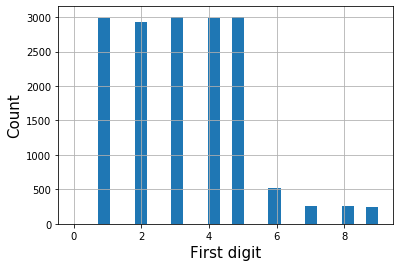

In [22]:
# plotting it out

lottery['first_digit'].hist(bins=25)
plt.xlabel("First digit", fontsize=15)
plt.ylabel("Count", fontsize=15)

None of the curves are in logarithmic shape, which is fairly curious. Would it be dependent on transformations?